From here we will add the `Dezero functions` to **`dezero/functions.py`**

```python
import numpy as np
from dezero import Function

class Sin(Function):
    def forward(self, x):
        y = np.sin(x)
        return y
    
    def backward(self, gy):
        x = self.inputs[0]
        gx = gy * cos(x)
        return gx
    
class Cos(Function):
    def forward(self, x):
        y = np.cos(x)
        return y
    
    def backward(self, gy):
        x = self.inputs[0]
        gx = gy * -sin(x)
        return gx
    

def sin(x):
    return Sin()(x)

def cos(x):
    return Cos()(x)
```

## high order differential for `Sin`

- testing 2nd, 3rd, 4th order

In [1]:
import numpy as np
from dezero import Variable
import dezero.functions as F

x = Variable(np.array(1.0))
y = F.sin(x)
y.backward(create_graph=True)

for i in range(3):
    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)
    print(x.grad)

Variable(-0.8414709848078965)
Variable(-0.5403023058681398)
Variable(0.8414709848078965)


### Let's draw a graph!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dezero import Variable
import dezero.functions as F

x = Variable(np.linspace(-7, 7, 200))
y = F.sin(x)
y.backward(create_graph=True)

logs = [y.data]

for i in range(3):
    logs.append(x.grad.data)

    gx = x.grad
    x.cleargrad()
    gx.backward(create_graph=True)

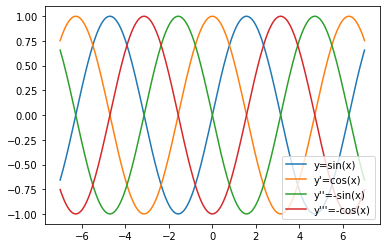

In [4]:
labels = ["y=sin(x)", "y'=cos(x)", "y''=-sin(x)", "y'''=-cos(x)"]
for i, v in enumerate(logs):
    plt.plot(x.data, logs[i], label=labels[i])
plt.legend(loc="lower right")
plt.show()